# QClus Tutorial - brain

This tutorial assumes you have followed the installation instructions in the README and have the necessary packages installed. If you have not, please refer to the README for installation instructions.

Furthermore, it assumes you have a 10X .h5 counts file and the fraction unspliced file. If you do not have the fraction unspliced file, you can follow the instructions in the README to generate it.

We begin by loading the necessary packages and data.

In [9]:
import qclus as qc
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

adata_path = '../../data/SAMN37485430_raw.h5ad'
fraction_unspliced = pd.read_csv("../../data/SAMN37485430_fraction_unspliced.csv", index_col=0)

fraction_unspliced.head()

,fraction_unspliced
AAACCCAAGAAATGGG,0.666294
AAACCCAAGATTGTGA,0.648267
AAACCCAAGGAGAGTA,0.677124
AAACCCAAGGTTGCCC,0.671604
AAACCCACAATACAGA,0.107778


Please make sure that the fraction unspliced file is in the correct format as shown above. The index should be the cell barcodes and there should be a column named "fraction_unspliced".

Since we are processing brain snRNA-seq data in this example, we have two options:

1. Run QClus without specific cell type genes sets, using only mitochondrial, unspliced, and nuclear fraction as clustering metrics:

In [ ]:
adata = qc.run_qclus(adata_path, fraction_unspliced,
                     minimum_genes=400,
                     clustering_features=['pct_counts_nuclear',
                                          'pct_counts_MT',
                                          'fraction_unspliced'],
                     clustering_k=3,
                     clusters_to_select=["0", "1"],
                     )

Note that since we are not performing seperation of cardiomyocytes, as in cardiac tissue, clustering k value is set to 3 and we only select the top 2 clusters in the filtering step.

2. Specify tissue specific cell type gene sets to use an additional clustering metric to fine-tune results:

In [17]:
# Azimuth markers
marker_genes_dict = {
    "Astro": ["SLC1A2", "ADGRV1", "SLC1A3", "GPC5", "RNF219.AS1", "ARHGAP24", "CST3", "HPSE2", "AQP4", "COL5A3"],
    "Endo": ["EBF1", "ABCG2", "CLDN5", "FLI1", "LEF1", "EMCN", "IFI27", "HLA.E", "ADGRL4", "CLEC3B"],
    "L2/3 IT": ["CBLN2", "EPHA6", "LAMA2", "CNTN5", "PDZD2", "CUX2", "RASGRF2", "FAM19A1", "LINCO1378", "CA10"],
    "L5 ET": ["COL5A2", "FAM91A1", "VAT1L", "COL24A1", "CBLN2", "NRP1", "PTCHD1.AS", "NRG1", "HOMER1", "SLC35F3"],
    "L5 IT": ["FSTL4", "CNTN5", "RORB", "FSTL5", "IL1RAPL2", "CHN2", "TOX", "CPNE4", "CADPS2", "POU6F2"],
    "L5/6 NP": ["TSHZ2", "NSPR1.AS1", "HTR2C", "ITGA8", "ZNF385D", "ASIC2", "CDH6", "CRYM", "NXPH2", "CPNE4"],
    "L6 CT": ["ADAMTSL1", "KIAA1217", "SORCS1", "HSS3T4", "TRPM3", "TOX", "SEMA3E", "EGFEM1P", "MEIS2", "SEMA5A"],
    "L6 IT": ["PTPRK", "PDZRNA", "CHD9", "THEMIS", "FSTL5", "CDH13", "CDH12", "CBLN2", "LY86.AS1", "MLIP"],
    "L6 IT Car3": ["THEMIS", "RNF152", "NTNG2", "STK32B", "KCNMB2", "GAS2L3", "OLFM2B", "POSTN", "B3GAT2", "NR4A2"],
    "L6b": ["HSS3T4", "KCNMB2", "MDFIC", "C10orf11", "NTM", "CDH9", "MARCH1", "TLE4", "FOXP2", "KIAA1217"],
    "Lamp5": ["FGF13", "PTPRT", "PRELID2", "GRIA4", "RELN", "PTCHD4", "EY4", "MYO16", "FBXL7", "LAMP5"],
    "Micro-PVM": ["DOCK8", "P2RY12", "APBB1IP", "FYB", "PTPRC", "TBXAS1", "CX3CR1", "BLNK", "SLCO2B1", "CSF1R"],
    "Oligo": ["PLP1", "ST18", "CTNNA3", "MBP", "MOBP", "RNF220", "NCKAP5", "ENPP2", "QKI", "SLC44A1"],
    "OPC": ["VCAN", "PDGFRA", "OLIG1", "SMOC1", "COL9A1", "STK32A", "BCAS1", "FERMT1", "THEC", "ZCCHC24"],
    "Pvalb": ["ADAMTS17", "ERBB4", "DPP10", "ZNF804A", "MYO16", "BTBD11", "GRIA4", "SLIT2", "SDK1", "PVALB"],
    "Sncg": ["CNR1", "SLC8A1", "ASIC2", "CXCL14", "MAML3", "ADARB2", "NPAS3", "CNTN5", "FSTL5", "SNCG"],
    "Sst": ["GRIK1", "RALL9", "SST", "TRHDE", "GRID2", "NXPH1", "COL25A1", "SLC8A1", "SOX6", "ST6GALNAC5"],
    "Sst Chodl": ["NPY", "FAM46A", "STAC", "OTOF", "NPY2R", "CRHBP", "ANKRD34B", "NOS1", "SST", "CHODL"],
    "Vip": ["GALNTL6", "LRP1B", "VIP", "GRM7", "KCNT2", "THSD7A", "ERBB4", "SYNPR", "ADARB2", "SLC24A3"],
    "VLMC": ["COLEC12", "ITIH5", "COL1A2", "TBX18", "EBF1", "C7", "COL6A2", "SRPX2", "FLVCR2", "FMO2"]
}

adata = qc.run_qclus(adata_path, fraction_unspliced,
                     minimum_genes=400,
                     celltype_gene_set_dict=marker_genes_dict,
                     clustering_features=['pct_counts_nonCM',
                                          'pct_counts_nuclear',
                                          'pct_counts_MT',
                                          'fraction_unspliced'],
                     clustering_k=3,
                     clusters_to_select=["0", "1"],
                     )

Now we can perform a check to see how many nuclei were filtered at each step and how many passed.

In [18]:
adata.obs.qclus.value_counts()

qclus
clustering filter    4221
passed               3002
outlier filter       1134
scrublet filter       468
initial filter        256
Name: count, dtype: int64

Now let's check what the distribution of the fraction unspliced, pct counts MT, pct counts nuclear, and total counts look like across the different filtering steps.

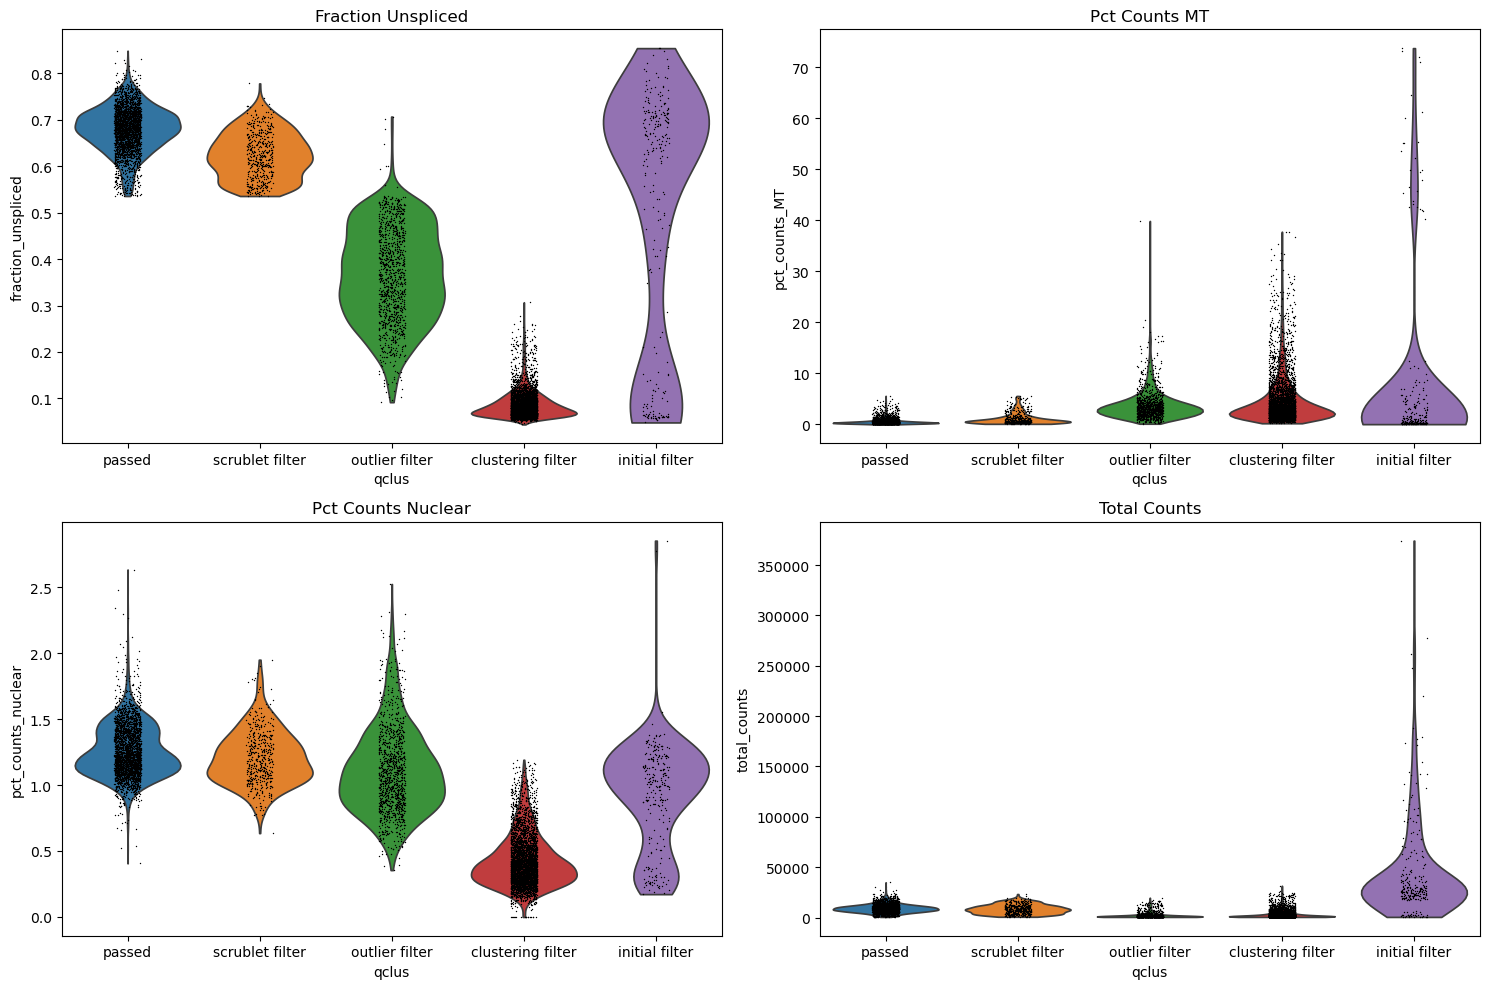

In [19]:
# Define the desired order of qclus categories
desired_order = ['passed', 'scrublet filter', 'outlier filter', 'clustering filter', 'initial filter']

# Get the unique values present in the qclus column
unique_qclus_values = adata.obs['qclus'].unique().tolist()

# Filter the desired order to only include categories that are present in the data
qclus_order = [category for category in desired_order if category in unique_qclus_values]

# Ensure the qclus column is a categorical type with the specified order
adata.obs['qclus'] = adata.obs['qclus'].astype('category')
adata.obs['qclus'] = adata.obs['qclus'].cat.reorder_categories(qclus_order, ordered=True)

# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot each subplot
sc.pl.violin(adata, 'fraction_unspliced', groupby='qclus', order=qclus_order, ax=axs[0, 0], show=False)
axs[0, 0].set_title('Fraction Unspliced')

sc.pl.violin(adata, 'pct_counts_MT', groupby='qclus', order=qclus_order, ax=axs[0, 1], show=False)
axs[0, 1].set_title('Pct Counts MT')

sc.pl.violin(adata, 'pct_counts_nuclear', groupby='qclus', order=qclus_order, ax=axs[1, 0], show=False)
axs[1, 0].set_title('Pct Counts Nuclear')

sc.pl.violin(adata, 'total_counts', groupby='qclus', order=qclus_order, ax=axs[1, 1], show=False)
axs[1, 1].set_title('Total Counts')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Now we filter out the nuclei flagged by the initial filter and visualize a UMAP of the clustering features.

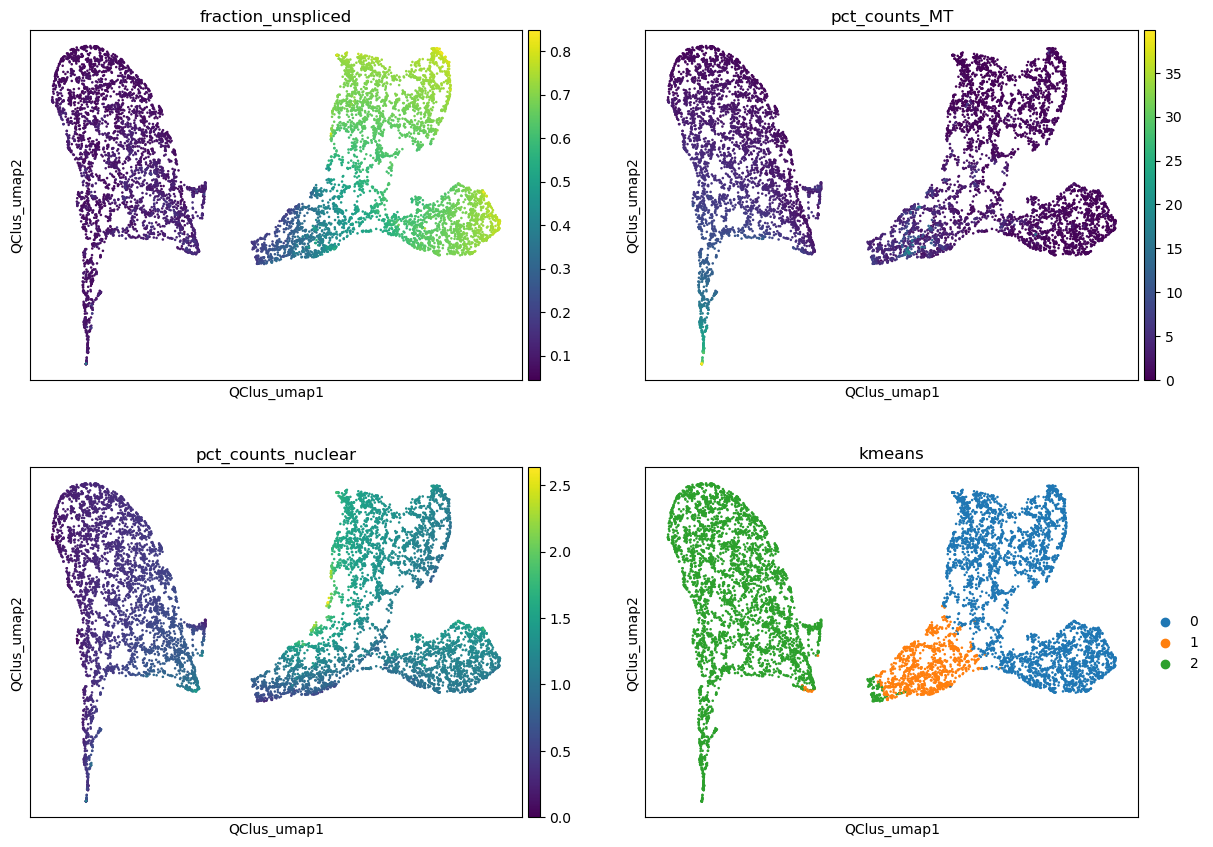

In [20]:
#filter out initial_filter annotated cells
adata = adata[adata.obs.qclus!="initial filter"]
adata.obsm["QClus_umap"] = adata.uns["QClus_umap"]

sc.pl.embedding(adata, basis="QClus_umap", color=["fraction_unspliced", "pct_counts_MT", "pct_counts_nuclear", "kmeans"], ncols=2)

Now we can perform standard processing for visualization purposes and visualize the data without filtering.

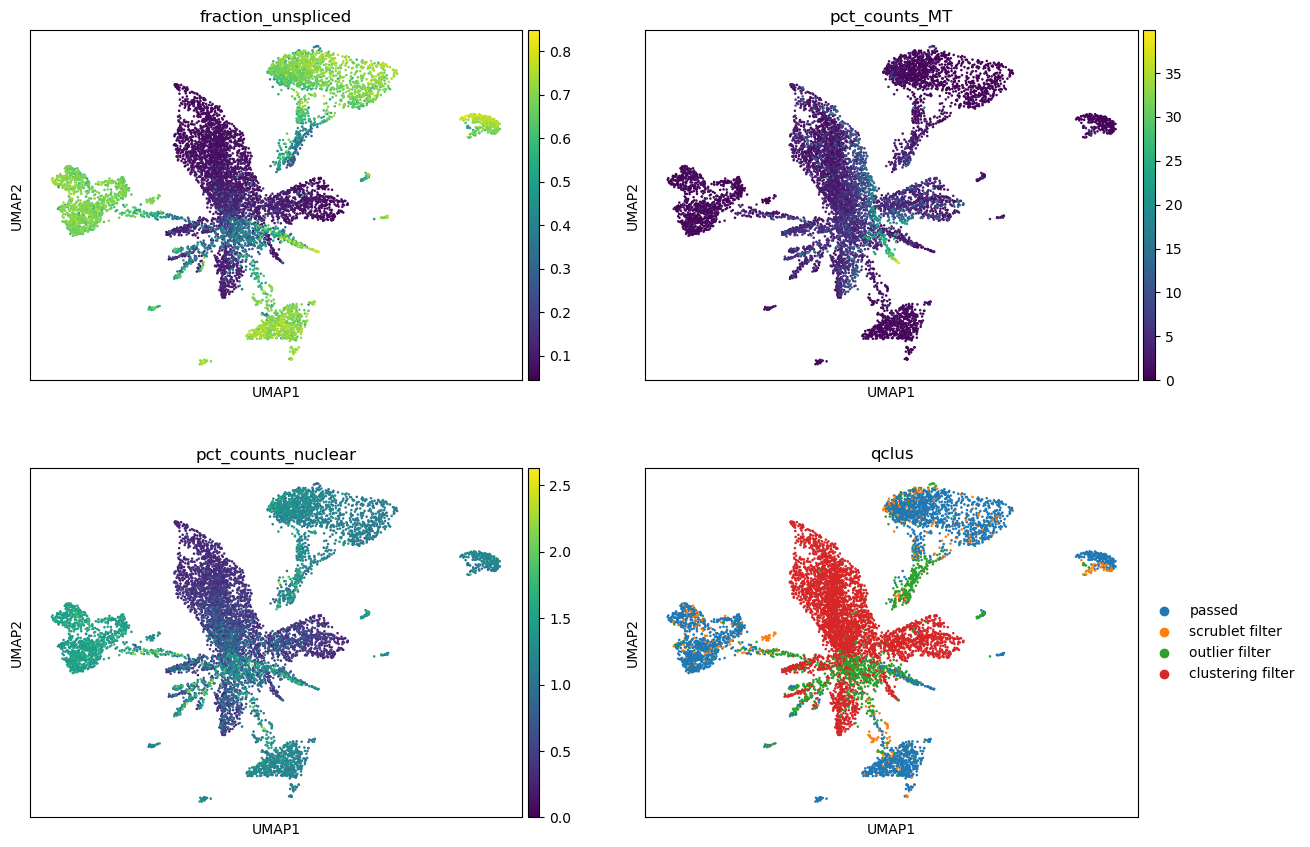

In [21]:
#run standard processing for visualization purposes
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

#save raw dataset and filter genes
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.filter_genes(adata, min_cells=10)
adata = adata[:, adata.var.highly_variable]

sc.pp.regress_out(adata, ['total_counts', 'pct_counts_MT'], n_jobs = 4)
sc.pp.scale(adata, max_value=10)

sc.tl.pca(adata, svd_solver='randomized')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden")

sc.pl.umap(adata, color=["fraction_unspliced", "pct_counts_MT", "pct_counts_nuclear", "qclus"], ncols=2)

Up until now, we have been visualizing the data without filtering out any nuclei (discounting the initial filter). Now, we will filter out the nuclei flagged by QClus and visualize the filtered data.

In [22]:
adata = adata[adata.obs.qclus=="passed"]
adata

View of AnnData object with n_obs × n_vars = 3002 × 7535
    obs: 'fraction_unspliced', 'pct_counts_MT', 'total_counts', 'n_genes_by_counts', 'kmeans', 'qclus', 'total_counts_Astro', 'pct_counts_Astro', 'total_counts_Endo', 'pct_counts_Endo', 'total_counts_L2/3 IT', 'pct_counts_L2/3 IT', 'total_counts_L5 ET', 'pct_counts_L5 ET', 'total_counts_L5 IT', 'pct_counts_L5 IT', 'total_counts_L5/6 NP', 'pct_counts_L5/6 NP', 'total_counts_L6 CT', 'pct_counts_L6 CT', 'total_counts_L6 IT', 'pct_counts_L6 IT', 'total_counts_L6 IT Car3', 'pct_counts_L6 IT Car3', 'total_counts_L6b', 'pct_counts_L6b', 'total_counts_Lamp5', 'pct_counts_Lamp5', 'total_counts_Micro-PVM', 'pct_counts_Micro-PVM', 'total_counts_Oligo', 'pct_counts_Oligo', 'total_counts_OPC', 'pct_counts_OPC', 'total_counts_Pvalb', 'pct_counts_Pvalb', 'total_counts_Sncg', 'pct_counts_Sncg', 'total_counts_Sst', 'pct_counts_Sst', 'total_counts_Sst Chodl', 'pct_counts_Sst Chodl', 'total_counts_Vip', 'pct_counts_Vip', 'total_counts_VLMC', 'pct_c

From here we can visualize the data after we have removed the nuclei flagged by QClus.

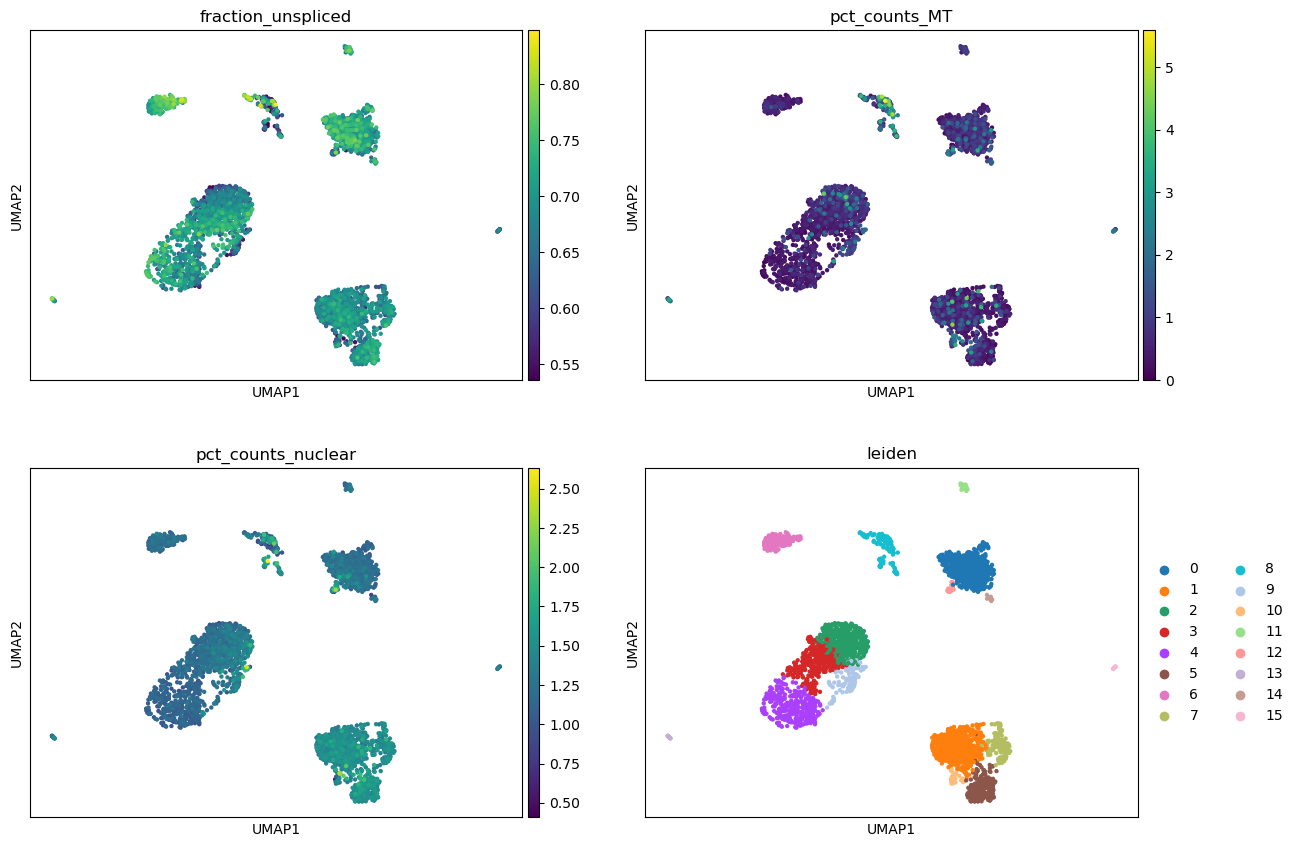

In [23]:
sc.tl.pca(adata, svd_solver='randomized')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden")

sc.pl.umap(adata, color=["fraction_unspliced", "pct_counts_MT", "pct_counts_nuclear", "leiden"], ncols=2)